In [1]:
import os, importlib, sys, time

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import scipy.linalg as la
import scipy.stats as stats
import scipy.optimize as opt

In [4]:
import freqepid

# 1. parameters

In [5]:
T = 60
T0 = 40

In [6]:
GPi = np.load('data/GPi.npz')

## observation parameters

In [7]:
alpha = 0.01
r_Y = 10

$$Y_t = NegBinom( \frac{EY_t}{r_Y + EY_t}, r_Y )$$

$$ EY_t = \alpha\sum_{s=1}^{t-1} I_s \pi_{t-s} $$

## latent parameters

In [8]:
d = 2
beta = np.array([0.25, -2.45])

In [9]:
r_I = 100
K = 6.5

$$I_t = NegBinom( \frac{EI_t}{r_I + EI_t}, r_I )$$

$$ EI_t = R(\bar{A}_t, \beta) \sum_{s=1}^{t-1} I_s g_{t-s} $$

$$R(\bar{A}_t, \beta) = \frac{K}{1+\exp(- \beta^\top A_t)}$$

## seed values

In [11]:
mu = np.log(100)

$$I_{[-T_0,0)} = \exp(\mu_0)$$

# 2. simulation

In [12]:
num_sim = 1000

## load simulation

In [13]:
data = pd.read_feather('data/simulation_randinf_1.feather')

In [14]:
data

,sim,date,R,EI,infection,EY,death,intervention
0,0,0,3.654147,365.412210,399.0,0.956069,0,0
1,0,1,3.654147,385.435983,503.0,0.962544,0,0
2,0,2,3.654147,465.159133,437.0,0.968304,0,0
3,0,3,3.654147,597.396974,649.0,0.973840,1,0
4,0,4,3.654147,762.880480,808.0,0.980570,1,0
...,...,...,...,...,...,...,...,...
59995,999,55,0.648378,375.180437,339.0,16.169417,18,1
59996,999,56,0.648378,354.125362,386.0,15.366388,14,1
59997,999,57,0.648378,334.331543,341.0,14.592187,13,1
59998,999,58,0.648378,316.412701,325.0,13.841366,6,1


# 3. Fit results

In [15]:
result = pd.read_feather('coverage_epidemia_nbinom_randinf_1.feather')

In [16]:
result

,b[0],b[1],"V[0,0]","V[1,0]","V[0,1]","V[1,1]"
0,0.590080,-2.842924,0.040875,-0.047194,-0.047194,0.063995
1,0.270867,-2.362474,0.030640,-0.036825,-0.036825,0.051760
2,0.534664,-2.984438,0.036192,-0.043489,-0.043489,0.063913
3,0.242806,-2.558725,0.026845,-0.034596,-0.034596,0.054149
4,0.176776,-2.348704,0.026990,-0.032927,-0.032927,0.047649
...,...,...,...,...,...,...
995,0.111224,-2.260317,0.024407,-0.029894,-0.029894,0.043244
996,0.198680,-2.231302,0.028458,-0.033716,-0.033716,0.046120
997,0.435340,-2.694894,0.034755,-0.041071,-0.041071,0.057253
998,0.254758,-2.428654,0.028975,-0.035329,-0.035329,0.050951


# 4. Confidence Region coverage test

In [17]:
model = freqepid.Model(GPi['g'], GPi['pi'], alpha, K, T0, 'nbinom')

In [18]:
bepi = np.zeros((num_sim, d))
Ts_epi = np.zeros(num_sim)
ps_epi = np.zeros(num_sim)

In [19]:
for iter_sim in np.arange(num_sim):
    start_sim = time.time()
    
    bepi[iter_sim] = result.iloc[iter_sim,:2].to_numpy()
    Ts_epi[iter_sim] = (bepi[iter_sim,1]-beta[1])/np.sqrt(result.iloc[iter_sim,-1])
    ps_epi[iter_sim] = 2*(1-stats.norm.cdf(np.abs(Ts_epi[iter_sim])))
    
    sys.__stdout__.write("%d-th simulation finished, %f sec.\n"
                         %(iter_sim+1, time.time()-start_sim))
    sys.__stdout__.flush()

1-th simulation finished, 0.002688 sec.
2-th simulation finished, 0.000386 sec.
3-th simulation finished, 0.000270 sec.
4-th simulation finished, 0.000269 sec.
5-th simulation finished, 0.000265 sec.
6-th simulation finished, 0.000269 sec.
7-th simulation finished, 0.000254 sec.
8-th simulation finished, 0.000246 sec.
9-th simulation finished, 0.000274 sec.
10-th simulation finished, 0.000261 sec.
11-th simulation finished, 0.000246 sec.
12-th simulation finished, 0.000247 sec.
13-th simulation finished, 0.000245 sec.
14-th simulation finished, 0.000263 sec.
15-th simulation finished, 0.000351 sec.
16-th simulation finished, 0.000286 sec.
17-th simulation finished, 0.000274 sec.
18-th simulation finished, 0.000255 sec.
19-th simulation finished, 0.000264 sec.
20-th simulation finished, 0.000255 sec.
21-th simulation finished, 0.000366 sec.
22-th simulation finished, 0.000257 sec.
23-th simulation finished, 0.000458 sec.
24-th simulation finished, 0.000429 sec.
25-th simulation finished

464-th simulation finished, 0.000091 sec.
465-th simulation finished, 0.000090 sec.
466-th simulation finished, 0.000089 sec.
467-th simulation finished, 0.000091 sec.
468-th simulation finished, 0.000091 sec.
469-th simulation finished, 0.000090 sec.
470-th simulation finished, 0.000092 sec.
471-th simulation finished, 0.000093 sec.
472-th simulation finished, 0.000089 sec.
473-th simulation finished, 0.000091 sec.
474-th simulation finished, 0.000090 sec.
475-th simulation finished, 0.000088 sec.
476-th simulation finished, 0.000094 sec.
477-th simulation finished, 0.000089 sec.
478-th simulation finished, 0.000087 sec.
479-th simulation finished, 0.000089 sec.
480-th simulation finished, 0.000089 sec.
481-th simulation finished, 0.000088 sec.
482-th simulation finished, 0.000087 sec.
483-th simulation finished, 0.000089 sec.
484-th simulation finished, 0.000088 sec.
485-th simulation finished, 0.000086 sec.
486-th simulation finished, 0.000088 sec.
487-th simulation finished, 0.0000

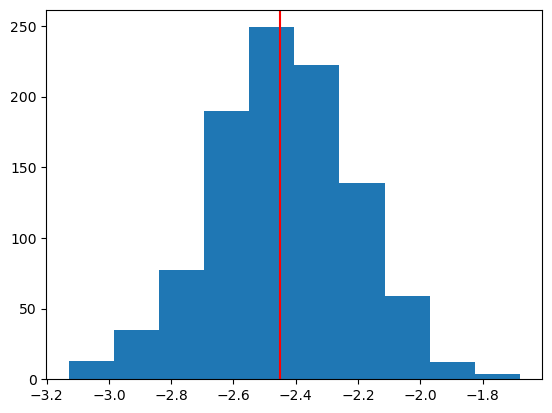

In [20]:
plt.hist(bepi[:,1])
plt.axvline(beta[1], color='red')

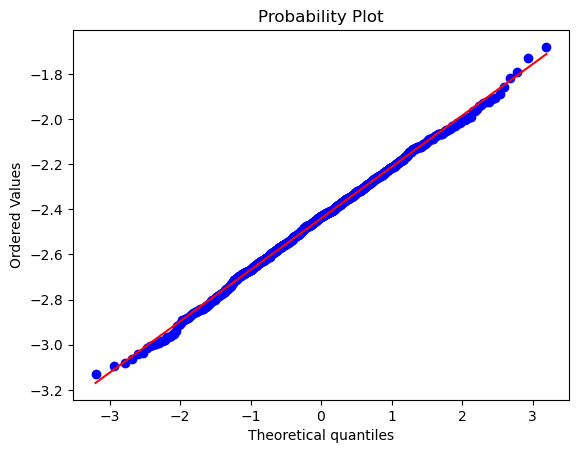

In [21]:
stats.probplot(bepi[:,1], dist = 'norm', plot=plt, fit=True)
# plt.plot([0, 1], [0, 1], color='black')
plt.show()

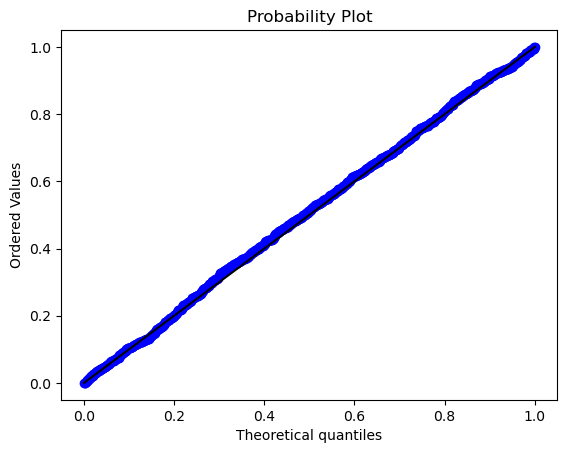

In [22]:
stats.probplot(ps_epi, dist = 'uniform', plot=plt, fit=False)
plt.plot([0, 1], [0, 1], color='black')
plt.show()

In [23]:
np.mean(np.abs(ps_epi) > 0.05)

0.952